# TWI Tutorial for WhiteboxTools
This tutorial demonstrates how to calculate the Topographic Wetness Index (TWI) using WhiteboxTools in Python.

## Section 1: Introduction
In this section, we introduce the TWI and its applications.

## Requirements

### 📋 Software Requirements

To run this tutorial successfully, you'll need the following:

#### **Python Environment:**
- **Python 3.8+** (recommended: Python 3.9 or 3.10)
- **Jupyter Notebook** or **VS Code** with Python extension

#### **Required Python Packages:**
```bash
# Core geospatial packages
whitebox>=2.2.0          # WhiteboxTools Python bindings
rasterio>=1.3.0          # Raster data I/O
numpy>=1.21.0            # Numerical computing
matplotlib>=3.5.0        # Plotting and visualization
scipy>=1.7.0             # Scientific computing

# Optional but recommended
geopandas>=0.12.0        # Vector data handling (if working with shapefiles)
folium>=0.12.0           # Interactive maps
jupyter>=1.0.0           # Jupyter notebook environment
```

#### **System Requirements:**
- **Operating System**: Windows, macOS, or Linux
- **Memory**: Minimum 4GB RAM (8GB+ recommended for large DEMs)
- **Storage**: At least 1GB free space for intermediate files
- **WhiteboxTools**: Automatically installed with the `whitebox` Python package

### 🚀 Installation Instructions

#### **Option 1: Using pip (Recommended)**
```bash
# Install all required packages
pip install whitebox rasterio numpy matplotlib scipy

# Optional packages
pip install geopandas folium jupyter
```

#### **Option 2: Using conda**
```bash
# Create a new environment (optional but recommended)
conda create -n twi-analysis python=3.9
conda activate twi-analysis

# Install packages
conda install -c conda-forge whitebox rasterio numpy matplotlib scipy
conda install -c conda-forge geopandas folium jupyter
```

#### **Option 3: Using requirements.txt**
Create a `requirements.txt` file with:
```txt
whitebox>=2.2.0
rasterio>=1.3.0
numpy>=1.21.0
matplotlib>=3.5.0
scipy>=1.7.0
geopandas>=0.12.0
folium>=0.12.0
jupyter>=1.0.0
```

Then install with:
```bash
pip install -r requirements.txt
```

### 📁 Data Requirements

#### **Input Data:**
- **DEM File**: GeoTIFF format (.tif)
  - **Coordinate System**: Any projected coordinate system (UTM recommended)
  - **Units**: Elevation values in meters
  - **Resolution**: 1-30 meters for optimal results
  - **File Size**: Can handle DEMs from small watersheds to large regions

#### **Example DEM Sources:**
- **USGS 3DEP**: 1m and 3m resolution DEMs for the USA
- **SRTM**: Global 30m resolution DEM
- **ASTER GDEM**: Global 30m resolution DEM
- **Local LiDAR**: High-resolution local datasets
- **OpenTopography**: Various resolution DEMs worldwide

### ⚠️ Important Notes

1. **WhiteboxTools**: The `whitebox` package automatically downloads and installs WhiteboxTools binaries
2. **Large DEMs**: For DEMs larger than 1GB, ensure adequate system memory
3. **Coordinate Systems**: Geographic coordinate systems (lat/lon) will show resolution as 0.00 - this is normal
4. **File Paths**: Use forward slashes (/) or raw strings for file paths to avoid issues
5. **Temporary Files**: The tutorial creates intermediate files that can be cleaned up after processing

### 🔧 Troubleshooting

**Common Issues:**
- **Import errors**: Ensure all packages are installed in the correct Python environment
- **WhiteboxTools not found**: Restart Python kernel after installing `whitebox` package
- **Memory errors**: Process smaller DEM tiles or increase system memory
- **File not found**: Check DEM file path and ensure it's in the correct directory

**Getting Help:**
- WhiteboxTools documentation: https://www.whiteboxgeo.com/manual/
- Rasterio documentation: https://rasterio.readthedocs.io/
- GitHub Issues: Report problems or ask questions

## Alternative: Download DEM from Google Earth Engine

If you don't have a DEM file yet, you can download one directly from Google Earth Engine using this section. This is particularly useful for getting high-resolution USGS 3DEP 1-meter DEMs for areas in the United States.

### 📋 Additional Requirements for Earth Engine:
```bash
# Install additional packages for Earth Engine integration
pip install earthengine-api geemap pycrs
```

### 🔧 Setup Process:
1. **Google Account**: You'll need a Google account registered with Earth Engine
2. **Authentication**: First-time users need to authenticate with Google Earth Engine
3. **Project ID**: You'll need a Google Cloud Project ID (can be created for free)
4. **Boundary**: You'll need a shapefile defining your area of interest

### ⚠️ Note:
This section is designed for Google Colab environment but can be adapted for local use. If you already have a DEM file, you can skip this section and proceed to the main tutorial.

In [ ]:
# Step 1: Mount Google Drive (for Google Colab)
# This cell only works in Google Colab environment
# Skip this if running locally

try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive mounted successfully")
    COLAB_ENV = True
except ImportError:
    print("ℹ️  Not running in Google Colab - skipping Drive mount")
    print("   If running locally, ensure your DEM files are in the current directory")
    COLAB_ENV = False

In [ ]:
# Step 2: Install and Import Earth Engine Dependencies
# Install required packages for Earth Engine integration

try:
    import ee
    import geemap
    import pycrs
    print("✅ Earth Engine packages already installed")
except ImportError:
    print("📦 Installing Earth Engine packages...")
    import subprocess
    import sys
    
    packages_to_install = ['earthengine-api', 'geemap', 'pycrs']
    for package in packages_to_install:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully")
        except Exception as e:
            print(f"❌ Failed to install {package}: {e}")
    
    # Import after installation
    import ee
    import geemap
    import pycrs

print("\n🔧 Earth Engine Setup Complete")

In [ ]:
# Step 3: Authenticate with Google Earth Engine
# This step is required for first-time users

print("🔐 Google Earth Engine Authentication")
print("=" * 50)

# First, try to initialize Earth Engine to check if already authenticated
try:
    ee.Initialize()
    print("✅ Google Earth Engine is already authenticated and initialized")
    EE_AUTHENTICATED = True
except ee.EEException as e:
    print("⚠️  Google Earth Engine requires authentication")
    print("   Please run the authentication process below")
    EE_AUTHENTICATED = False
except Exception as e:
    print(f"❌ Unexpected error during Earth Engine initialization: {e}")
    EE_AUTHENTICATED = False

# If not authenticated, guide user through authentication
if not EE_AUTHENTICATED:
    print("\n🔑 Authentication Required:")
    print("   1. Run: ee.Authenticate()")
    print("   2. Follow the prompts to authenticate with your Google account")
    print("   3. Then run: ee.Initialize(project='your-project-id')")
    print("   4. Replace 'your-project-id' with your actual Google Cloud Project ID")
    print("\n💡 Tip: You can create a free Google Cloud Project at: https://console.cloud.google.com/")
    
    # Uncomment and run these lines for first-time authentication:
    # ee.Authenticate()
    # ee.Initialize(project='your-project-id')  # Replace with your project ID

In [ ]:
# Step 4: Download High-Resolution DEM from Google Earth Engine
# This code downloads USGS 3DEP 1-meter DEM data for your area of interest

print("🌍 Downloading DEM from Google Earth Engine")
print("=" * 50)

if EE_AUTHENTICATED:
    print("📁 Setting up file paths...")
    
    if COLAB_ENV:
        # Paths for Google Colab environment
        shp_path = '/content/drive/My Drive/DEM/Boundary.shp'  # UPDATE THIS PATH
        out_dir = '/content/drive/My Drive/DEM'
        out_file = os.path.join(out_dir, 'dem_clipped.tif')
    else:
        # Paths for local environment
        shp_path = './Boundary.shp'  # UPDATE THIS PATH
        out_dir = './'
        out_file = './dem_clipped.tif'
    
    print(f"   📍 Boundary shapefile: {shp_path}")
    print(f"   📂 Output directory: {out_dir}")
    print(f"   📄 Output DEM file: {out_file}")
    
    # Check if the boundary shapefile exists
    if not os.path.exists(shp_path):
        print(f"\n❌ Error: Boundary shapefile not found at {shp_path}")
        print("\n🔧 To use this feature, you need:")
        print("   1. A shapefile defining your area of interest")
        print("   2. Update the 'shp_path' variable above with your shapefile location")
        print("   3. Ensure the shapefile contains: .shp, .shx, .dbf, and .prj files")
        print("\n💡 Alternative: Skip this section and use an existing DEM file")
    else:
        print(f"✅ Found boundary shapefile")
        
        try:
            print(f"\n🗺️  Processing area of interest...")
            
            # Convert shapefile to Earth Engine FeatureCollection
            aoi = geemap.shp_to_ee(shp_path)
            print("   ✅ Shapefile converted to Earth Engine format")
            
            # Load the USGS 3DEP 1-meter DEM collection
            print(f"\n📡 Accessing USGS 3DEP 1-meter DEM collection...")
            dem_collection = ee.ImageCollection("USGS/3DEP/1m")
            
            # Mosaic the collection and clip to area of interest
            print("   🧩 Mosaicking DEM tiles...")
            dem_mosaic = dem_collection.mosaic().clip(aoi)
            
            # Create output directory if it doesn't exist
            if not os.path.exists(out_dir):
                os.makedirs(out_dir)
                print(f"   📁 Created output directory: {out_dir}")
            
            # Export the clipped DEM
            print(f"\n⬇️  Downloading DEM (this may take several minutes)...")
            print("   📊 DEM specifications:")
            print("   • Source: USGS 3DEP")
            print("   • Resolution: 1 meter")
            print("   • Format: GeoTIFF")
            print("   • Coordinate System: UTM (automatically determined)")
            
            geemap.ee_export_image(
                dem_mosaic, 
                filename=out_file, 
                scale=1,  # 1-meter resolution
                region=aoi.geometry(), 
                file_per_band=False
            )
            
            print(f"\n✅ DEM successfully downloaded!")
            print(f"   📍 Location: {out_file}")
            print(f"   🎯 Ready to use in the main TWI tutorial")
            print(f"\n💡 Next Steps:")
            print(f"   1. Update the 'dem_filename' variable in the main tutorial")
            print(f"   2. Set it to: '{os.path.basename(out_file)}'")
            print(f"   3. Continue with the TWI calculation")
            
            # Update the dem_filename for the main tutorial if we're in the same environment
            dem_filename = out_file if COLAB_ENV else os.path.basename(out_file)
            print(f"\n🔄 Updated dem_filename = '{dem_filename}'")
            
        except ee.EEException as e:
            print(f"\n❌ Earth Engine Error: {e}")
            print("💡 Check your Earth Engine authentication and project settings")
        except Exception as e:
            print(f"\n❌ An error occurred during DEM download: {e}")
            print("💡 Check your shapefile format and Earth Engine setup")

else:
    print("⚠️  Earth Engine not authenticated")
    print("   Please complete the authentication steps above first")
    print("   Then re-run this cell to download the DEM")

print(f"\n🎯 DEM Download Section Complete")

In [14]:
# Install required packages
# Run this cell first to install all necessary dependencies

import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
packages = [
    "whitebox",           # WhiteboxTools for terrain analysis
    "rasterio",           # For reading/writing raster data
    "matplotlib",         # For plotting and visualization
    "numpy",              # For numerical operations
    "scipy"               # For scientific computing
]

print("Installing required packages...")
for package in packages:
    try:
        install_package(package)
        print(f"✅ {package} installed successfully")
    except Exception as e:
        print(f"❌ Failed to install {package}: {e}")

print("\n🎉 Installation complete!")

Installing required packages...
✅ whitebox installed successfully
✅ whitebox installed successfully
✅ rasterio installed successfully
✅ rasterio installed successfully
✅ matplotlib installed successfully
✅ matplotlib installed successfully
✅ numpy installed successfully
✅ numpy installed successfully
✅ scipy installed successfully

🎉 Installation complete!
✅ scipy installed successfully

🎉 Installation complete!


In [15]:
# Import required libraries and initialize WhiteboxTools
import whitebox
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import tempfile
import os
from pathlib import Path

# Initialize WhiteboxTools
wbt = whitebox.WhiteboxTools()
wbt.verbose = False  # Set to True for detailed output

print("🔧 WhiteboxTools Initialization")
print("=" * 40)
print(f"✅ WhiteboxTools version: {wbt.version()}")
print(f"📦 Available tools: {len(wbt.list_tools())} tools")
print(f"📁 Work directory: {wbt.work_dir}")
print("\n🎯 Ready to process your DEM data!")

🔧 WhiteboxTools Initialization
✅ WhiteboxTools version: WhiteboxTools v2.4.0 (c) Dr. John Lindsay 2017-2023

WhiteboxTools is an advanced geospatial data analysis platform developed at
the University of Guelph's Geomorphometry and Hydrogeomatics Research 
Group (GHRG). See www.whiteboxgeo.com for more details.

📦 Available tools: 484 tools
📁 Work directory: 

🎯 Ready to process your DEM data!


## 2. Data Loading and Examination

In this section, we'll load your DEM file and examine its properties. Make sure your DEM file is in GeoTIFF format and placed in the same directory as this notebook.

### 📋 Expected DEM Properties:
- **Format**: GeoTIFF (.tif)
- **Coordinate System**: Any projected coordinate system (UTM recommended)
- **Units**: Elevation in meters
- **Resolution**: Ideally 1-30 meters for detailed analysis

### 🔍 What we'll examine:
- File format and properties
- Elevation statistics
- Spatial extent and resolution
- Data quality (NoData values, artifacts)

✅ Found DEM file: dem_clipped.tif

🔍 Loading DEM data from: dem_clipped.tif

📊 DEM Properties:
   • Dimensions: 806 rows × 1056 columns
   • Resolution: 0.00 × 0.00 meters
   • Data type: float32
   • Coordinate system: EPSG:4326
   • Spatial extent: BoundingBox(left=-97.1175930015416, bottom=41.40183329223858, right=-97.10810679214129, top=41.40907371342858)
   • NoData value: None

📈 Elevation Statistics:
   • Minimum elevation: 414.92 m
   • Maximum elevation: 418.95 m
   • Mean elevation: 416.01 m
   • Standard deviation: 0.45 m
   • Elevation range: 4.04 m

📊 Creating visualization...


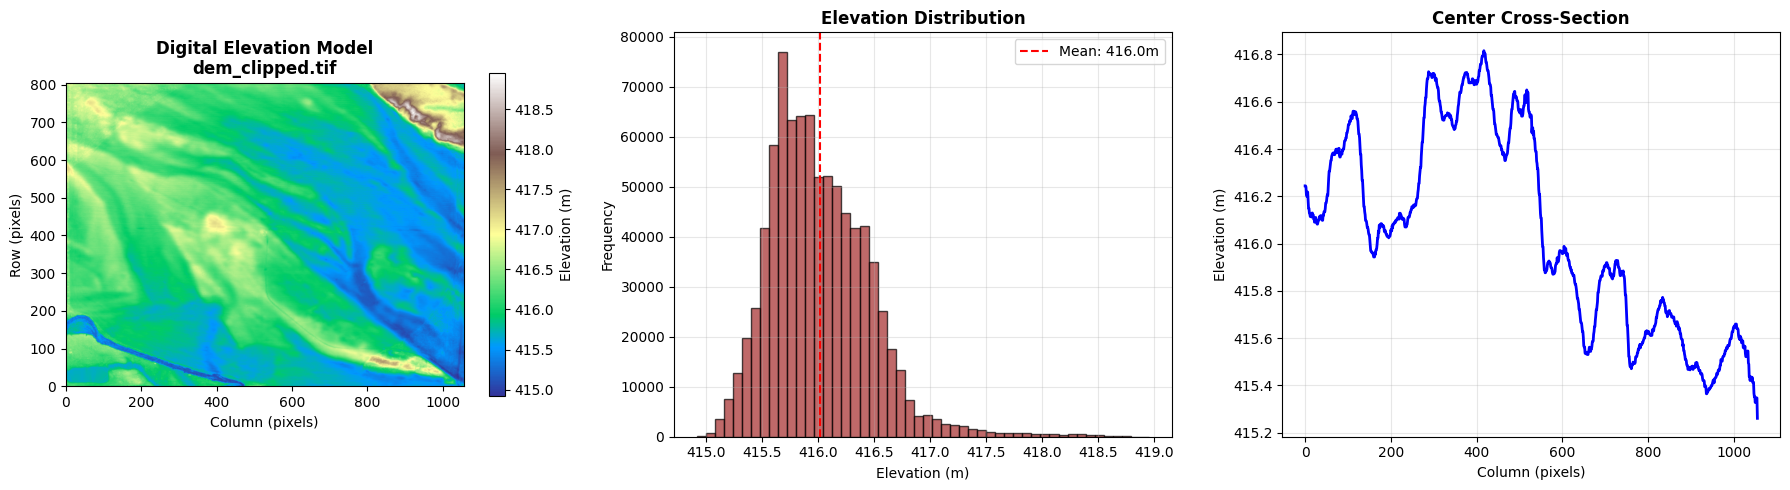


✅ DEM loaded successfully! Ready for wetness index calculation.
🎯 Your DEM covers 851,136 pixels
📐 Study area: ~0.00 km²


In [16]:
# Load and examine your DEM data
# 📁 Place your DEM file in the same directory as this notebook
# 🔄 Update the filename below to match your DEM file

# Configuration - UPDATE THIS PATH TO YOUR DEM FILE
dem_filename = "dem_clipped.tif"  # 👈 Change this to your DEM filename

# Check if the DEM file exists
if not os.path.exists(dem_filename):
    print(f"❌ DEM file not found: {dem_filename}")
    print("\n🔧 Troubleshooting:")
    print("1. Make sure your DEM file is in the same directory as this notebook")
    print("2. Update the 'dem_filename' variable above with your actual filename")
    print("3. Ensure the file has a .tif extension")
    print("\n📂 Files in current directory:")
    for file in os.listdir('.'):
        if file.endswith('.tif'):
            print(f"   - {file}")
else:
    print(f"✅ Found DEM file: {dem_filename}")

# Load and examine the DEM
if os.path.exists(dem_filename):
    print(f"\n🔍 Loading DEM data from: {dem_filename}")
    
    with rasterio.open(dem_filename) as src:
        # Read the first band (elevation data)
        dem_data = src.read(1)
        dem_profile = src.profile
        dem_transform = src.transform
        dem_crs = src.crs
        dem_bounds = src.bounds
        
        print(f"\n📊 DEM Properties:")
        print(f"   • Dimensions: {dem_data.shape[0]} rows × {dem_data.shape[1]} columns")
        print(f"   • Resolution: {abs(dem_transform[0]):.2f} × {abs(dem_transform[4]):.2f} meters")
        print(f"   • Data type: {dem_data.dtype}")
        print(f"   • Coordinate system: {dem_crs}")
        print(f"   • Spatial extent: {dem_bounds}")
        print(f"   • NoData value: {src.nodata}")
        
        # Calculate DEM statistics
        valid_data = dem_data[dem_data != src.nodata] if src.nodata is not None else dem_data
        # Ensure valid_data is a 1D array for histogram plotting
        valid_data = valid_data.flatten()
        
        print(f"\n📈 Elevation Statistics:")
        print(f"   • Minimum elevation: {np.min(valid_data):.2f} m")
        print(f"   • Maximum elevation: {np.max(valid_data):.2f} m")
        print(f"   • Mean elevation: {np.mean(valid_data):.2f} m")
        print(f"   • Standard deviation: {np.std(valid_data):.2f} m")
        print(f"   • Elevation range: {np.max(valid_data) - np.min(valid_data):.2f} m")
        
        # Check for NoData values
        if src.nodata is not None:
            nodata_count = np.sum(dem_data == src.nodata)
            nodata_percent = (nodata_count / dem_data.size) * 100
            print(f"   • NoData cells: {nodata_count:,} ({nodata_percent:.2f}%)")
        
        # Visualization
        print(f"\n📊 Creating visualization...")
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # 1. DEM visualization
        dem_display = np.where(dem_data == src.nodata, np.nan, dem_data) if src.nodata is not None else dem_data
        im1 = axes[0].imshow(dem_display, cmap='terrain', origin='lower')
        axes[0].set_title(f'Digital Elevation Model\n{dem_filename}', fontweight='bold')
        axes[0].set_xlabel('Column (pixels)')
        axes[0].set_ylabel('Row (pixels)')
        plt.colorbar(im1, ax=axes[0], label='Elevation (m)', shrink=0.8)
        
        # 2. Elevation histogram
        axes[1].hist(valid_data, bins=50, alpha=0.7, color='brown', edgecolor='black')
        axes[1].set_title('Elevation Distribution', fontweight='bold')
        axes[1].set_xlabel('Elevation (m)')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3)
        axes[1].axvline(np.mean(valid_data), color='red', linestyle='--', 
                       label=f'Mean: {np.mean(valid_data):.1f}m')
        axes[1].legend()
        
        # 3. Elevation vs. Position (cross-section)
        center_row = dem_data.shape[0] // 2
        cross_section = dem_display[center_row, :]
        axes[2].plot(cross_section, linewidth=2, color='blue')
        axes[2].set_title('Center Cross-Section', fontweight='bold')
        axes[2].set_xlabel('Column (pixels)')
        axes[2].set_ylabel('Elevation (m)')
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✅ DEM loaded successfully! Ready for wetness index calculation.")
        print(f"🎯 Your DEM covers {dem_data.shape[0] * dem_data.shape[1]:,} pixels")
        print(f"📐 Study area: ~{(dem_data.shape[0] * abs(dem_transform[4]) * dem_data.shape[1] * abs(dem_transform[0])) / 1000000:.2f} km²")
        
else:
    print("\n⚠️  Cannot proceed without a valid DEM file.")
    print("Please ensure your DEM file is available and update the filename above.")

## 3. DEM Preprocessing: Depression Filling

### Why Fill Depressions?

Raw DEMs often contain **depressions** (sinks) - areas where water would artificially pool due to:
- Data processing artifacts
- Smoothing effects
- Resolution limitations
- Measurement errors

These depressions create **unrealistic flow patterns** and must be removed before hydrological analysis.

### 🔧 Depression Filling Methods:

1. **BreachDepressionsLeastCost** (used here): Minimally modifies the DEM by carving channels
2. **FillDepressions**: Fills depressions by raising elevation values
3. **HybridBreachBurn**: Combines breaching and burning approaches

### 📋 What this step does:
- ✅ Removes artificial depressions
- ✅ Ensures continuous flow paths
- ✅ Preserves natural terrain features
- ✅ Minimal elevation modification

🔧 DEM Preprocessing: Depression Filling

📁 Step 3.1: Preparing DEM for WhiteboxTools
WhiteboxTools requires uncompressed GeoTIFF files...
   • Original compression: deflate
   • Creating uncompressed version...
   ✅ Uncompressed DEM created: dem_uncompressed.tif

💧 Step 3.2: Filling depressions
Using BreachDepressionsLeastCost for minimal terrain modification...
   ✅ Depression filling completed successfully!
   📊 Modification statistics:
      • Cells modified: 132,302 (15.54%)
      • Max elevation change: 0.096 m
      • Mean elevation change: -0.001 m

📊 Creating comparison visualization...
   ✅ Depression filling completed successfully!
   📊 Modification statistics:
      • Cells modified: 132,302 (15.54%)
      • Max elevation change: 0.096 m
      • Mean elevation change: -0.001 m

📊 Creating comparison visualization...


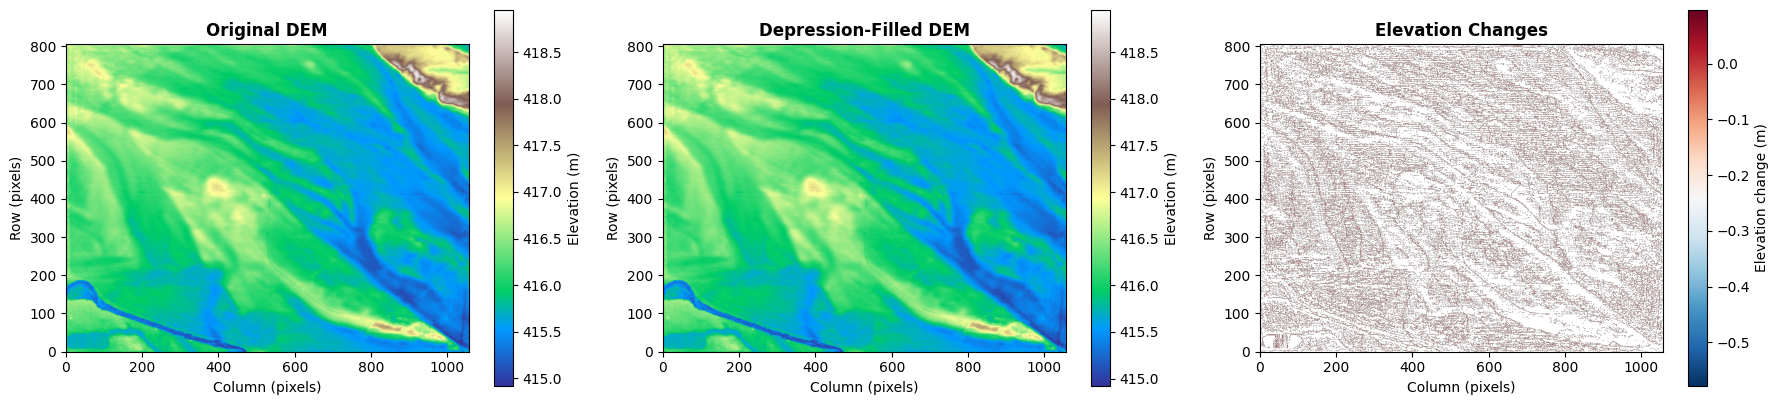

   ✅ Ready for flow accumulation calculation!
   🧹 Cleaned up temporary file: dem_uncompressed.tif


In [17]:
# Step 3: Depression Filling
# This step removes artificial depressions that would prevent proper flow modeling

print("🔧 DEM Preprocessing: Depression Filling")
print("=" * 50)

# Set up file paths
current_dir = os.getcwd()
dem_path = os.path.join(current_dir, dem_filename)
dem_uncompressed_path = os.path.join(current_dir, "dem_uncompressed.tif")
filled_dem_path = os.path.join(current_dir, "filled_dem.tif")

# Step 3.1: Handle DEM compression (WhiteboxTools requirement)
print("\n📁 Step 3.1: Preparing DEM for WhiteboxTools")
print("WhiteboxTools requires uncompressed GeoTIFF files...")

try:
    with rasterio.open(dem_path) as src:
        dem_data_orig = src.read(1)
        profile = src.profile.copy()
        
        # Check if DEM is compressed
        compression = profile.get('compress', None)
        if compression:
            print(f"   • Original compression: {compression}")
            print("   • Creating uncompressed version...")
            
            # Remove compression from profile
            profile.update({
                'compress': None,
                'tiled': False
            })
            
            # Save uncompressed version
            with rasterio.open(dem_uncompressed_path, 'w', **profile) as dst:
                dst.write(dem_data_orig, 1)
            
            input_dem = dem_uncompressed_path
            print(f"   ✅ Uncompressed DEM created: {os.path.basename(dem_uncompressed_path)}")
        else:
            print("   ✅ DEM is already uncompressed")
            input_dem = dem_path
            
except Exception as e:
    print(f"   ❌ Error preparing DEM: {e}")
    input_dem = dem_path  # Try with original file

# Step 3.2: Fill depressions
print(f"\n💧 Step 3.2: Filling depressions")
print("Using BreachDepressionsLeastCost for minimal terrain modification...")

try:
    wbt.breach_depressions_least_cost(
        dem=input_dem,
        output=filled_dem_path,
        dist=1000,        # Maximum breach distance
        min_dist=True,    # Use minimum distance for breaching
        fill=True         # Fill remaining depressions
    )
    
    if os.path.exists(filled_dem_path):
        print("   ✅ Depression filling completed successfully!")
        
        # Load and compare original vs filled DEM
        with rasterio.open(input_dem) as src:
            original_dem = src.read(1)
            
        with rasterio.open(filled_dem_path) as src:
            filled_dem = src.read(1)
            
        # Calculate modification statistics
        differences = filled_dem - original_dem
        modified_cells = np.sum(differences != 0)
        total_cells = original_dem.size
        
        print(f"   📊 Modification statistics:")
        print(f"      • Cells modified: {modified_cells:,} ({(modified_cells/total_cells)*100:.2f}%)")
        print(f"      • Max elevation change: {np.max(differences):.3f} m")
        print(f"      • Mean elevation change: {np.mean(differences):.3f} m")
        
        # Visualization
        print(f"\n📊 Creating comparison visualization...")
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # Original DEM
        im1 = axes[0].imshow(original_dem, cmap='terrain', origin='lower')
        axes[0].set_title('Original DEM', fontweight='bold')
        axes[0].set_xlabel('Column (pixels)')
        axes[0].set_ylabel('Row (pixels)')
        plt.colorbar(im1, ax=axes[0], label='Elevation (m)', shrink=0.8)
        
        # Filled DEM
        im2 = axes[1].imshow(filled_dem, cmap='terrain', origin='lower')
        axes[1].set_title('Depression-Filled DEM', fontweight='bold')
        axes[1].set_xlabel('Column (pixels)')
        axes[1].set_ylabel('Row (pixels)')
        plt.colorbar(im2, ax=axes[1], label='Elevation (m)', shrink=0.8)
        
        # Differences (modifications)
        diff_display = np.where(differences == 0, np.nan, differences)
        im3 = axes[2].imshow(diff_display, cmap='RdBu_r', origin='lower')
        axes[2].set_title('Elevation Changes', fontweight='bold')
        axes[2].set_xlabel('Column (pixels)')
        axes[2].set_ylabel('Row (pixels)')
        plt.colorbar(im3, ax=axes[2], label='Elevation change (m)', shrink=0.8)
        
        plt.tight_layout()
        plt.show()
        
        print(f"   ✅ Ready for flow accumulation calculation!")
        
    else:
        print("   ❌ Depression filling failed - output file not created")
        
except Exception as e:
    print(f"   ❌ Error during depression filling: {e}")
    print("   💡 Try checking your WhiteboxTools installation")
    
# Clean up temporary uncompressed file if created
if os.path.exists(dem_uncompressed_path) and dem_uncompressed_path != dem_path:
    try:
        os.remove(dem_uncompressed_path)
        print(f"   🧹 Cleaned up temporary file: {os.path.basename(dem_uncompressed_path)}")
    except:
        pass

## 4. Flow Accumulation Calculation

### What is Flow Accumulation?

Flow accumulation represents the **drainage area** (or specific contributing area) that flows into each cell. It's a key component of the wetness index calculation.

### 🌊 Flow Direction Algorithms:

| Algorithm | Description | Best For | Pros | Cons |
|-----------|-------------|-----------|------|------|
| **D8** | Single flow direction | Stream networks | Fast, simple | Unrealistic parallel flow |
| **FD8** | Multiple flow direction | Hillslope analysis | Realistic flow distribution | More complex |
| **D-infinity** | Fractional flow direction | Research applications | Most accurate | Computationally intensive |

### 🎯 What we'll calculate:
- **Specific Contributing Area (SCA)**: Area per unit contour length
- **Flow accumulation maps** using different algorithms
- **Comparative analysis** of methods

### 📊 Expected patterns:
- **Valley bottoms**: Highest flow accumulation
- **Ridges**: Lowest flow accumulation  
- **Stream channels**: Linear high-accumulation features

🌊 Flow Accumulation Calculation

🔸 Method 1: D8 Flow Accumulation
   • Single flow direction algorithm
   • Fast and simple
   • Best for stream network delineation
   ✅ D8 flow accumulation completed successfully

🔸 Method 2: FD8 Flow Accumulation
   • Multiple flow direction algorithm
   • More realistic flow distribution
   • Best for hillslope analysis
   ✅ D8 flow accumulation completed successfully

🔸 Method 2: FD8 Flow Accumulation
   • Multiple flow direction algorithm
   • More realistic flow distribution
   • Best for hillslope analysis
   ✅ FD8 flow accumulation completed successfully

🔸 Method 3: D-infinity Flow Accumulation
   • Fractional flow direction algorithm
   • Most accurate flow modeling
   • Best for research applications
   ✅ FD8 flow accumulation completed successfully

🔸 Method 3: D-infinity Flow Accumulation
   • Fractional flow direction algorithm
   • Most accurate flow modeling
   • Best for research applications
   ✅ D-infinity flow accumulation completed

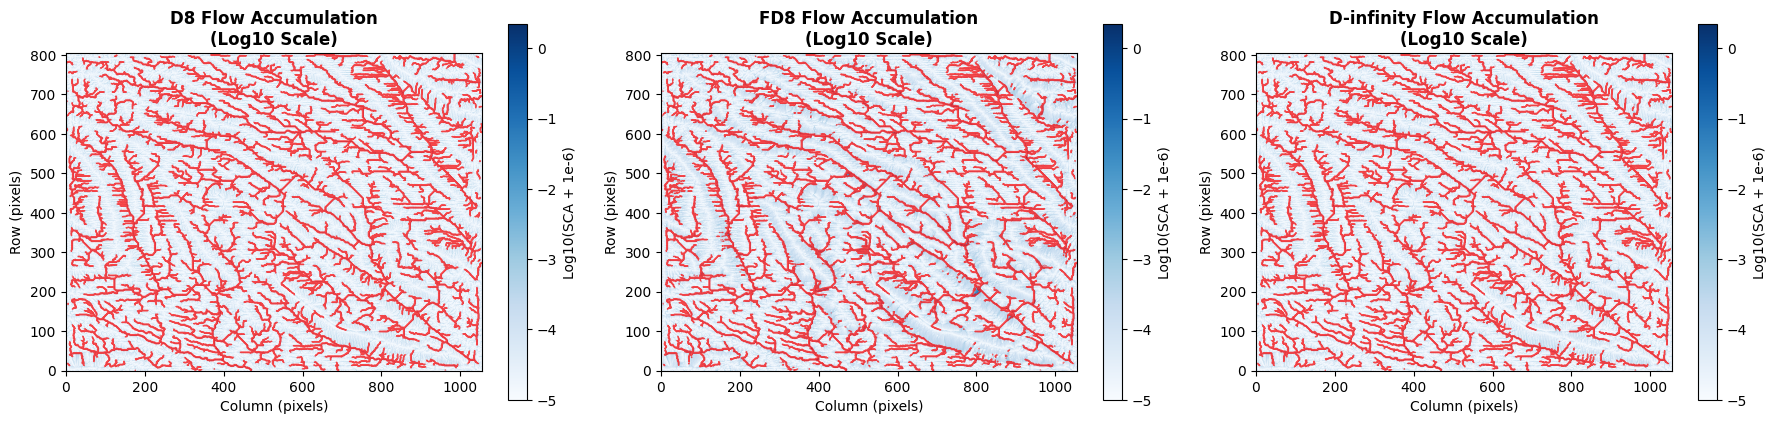

   ✅ Flow accumulation visualization complete!
   💡 Blue areas = high flow accumulation (valleys, streams)
   💡 Light areas = low flow accumulation (ridges, hilltops)
   💡 Red contours = stream channels (95th percentile)

🎯 Ready for slope calculation!


In [18]:
# Step 4: Flow Accumulation Calculation
# Calculate drainage area using multiple flow direction algorithms

print("🌊 Flow Accumulation Calculation")
print("=" * 50)

# Define output file paths
flow_outputs = {
    'D8': os.path.join(current_dir, "flow_accum_d8.tif"),
    'FD8': os.path.join(current_dir, "flow_accum_fd8.tif"),
    'D-infinity': os.path.join(current_dir, "flow_accum_dinf.tif")
}

successful_methods = []
flow_data = {}

# Method 1: D8 Flow Accumulation
print("\n🔸 Method 1: D8 Flow Accumulation")
print("   • Single flow direction algorithm")
print("   • Fast and simple")
print("   • Best for stream network delineation")

try:
    wbt.d8_flow_accumulation(
        i=filled_dem_path,
        output=flow_outputs['D8'],
        out_type="specific contributing area"
    )
    
    if os.path.exists(flow_outputs['D8']):
        print("   ✅ D8 flow accumulation completed successfully")
        successful_methods.append('D8')
        
        # Load data for analysis
        with rasterio.open(flow_outputs['D8']) as src:
            flow_data['D8'] = src.read(1)
    else:
        print("   ❌ D8 flow accumulation failed")
        
except Exception as e:
    print(f"   ❌ D8 flow accumulation error: {e}")

# Method 2: FD8 Flow Accumulation (Multiple Flow Direction)
print("\n🔸 Method 2: FD8 Flow Accumulation")
print("   • Multiple flow direction algorithm")
print("   • More realistic flow distribution")
print("   • Best for hillslope analysis")

try:
    wbt.fd8_flow_accumulation(
        dem=filled_dem_path,
        output=flow_outputs['FD8'],
        out_type="specific contributing area",
        exponent=1.1
    )
    
    if os.path.exists(flow_outputs['FD8']):
        print("   ✅ FD8 flow accumulation completed successfully")
        successful_methods.append('FD8')
        
        # Load data for analysis
        with rasterio.open(flow_outputs['FD8']) as src:
            flow_data['FD8'] = src.read(1)
    else:
        print("   ❌ FD8 flow accumulation failed")
        
except Exception as e:
    print(f"   ❌ FD8 flow accumulation error: {e}")

# Method 3: D-infinity Flow Accumulation
print("\n🔸 Method 3: D-infinity Flow Accumulation")
print("   • Fractional flow direction algorithm")
print("   • Most accurate flow modeling")
print("   • Best for research applications")

try:
    wbt.d_inf_flow_accumulation(
        i=filled_dem_path,
        output=flow_outputs['D-infinity'],
        out_type="specific contributing area"
    )
    
    if os.path.exists(flow_outputs['D-infinity']):
        print("   ✅ D-infinity flow accumulation completed successfully")
        successful_methods.append('D-infinity')
        
        # Load data for analysis
        with rasterio.open(flow_outputs['D-infinity']) as src:
            flow_data['D-infinity'] = src.read(1)
    else:
        print("   ❌ D-infinity flow accumulation failed")
        
except Exception as e:
    print(f"   ❌ D-infinity flow accumulation error: {e}")

# Results summary and visualization
print(f"\n📊 Flow Accumulation Results:")
print(f"   • Successfully calculated: {len(successful_methods)} methods")
print(f"   • Methods completed: {', '.join(successful_methods)}")

if successful_methods:
    # Calculate and display statistics
    print(f"\n📈 Flow Accumulation Statistics:")
    
    for method in successful_methods:
        data = flow_data[method]
        valid_data = data[data > 0]  # Remove zero/negative values
        
        print(f"\n   {method} Algorithm:")
        print(f"      • Min SCA: {np.min(valid_data):.6f} m²/m")
        print(f"      • Max SCA: {np.max(valid_data):.2f} m²/m")
        print(f"      • Mean SCA: {np.mean(valid_data):.6f} m²/m")
        print(f"      • 95th percentile: {np.percentile(valid_data, 95):.3f} m²/m")
    
    # Create visualization
    print(f"\n📊 Creating flow accumulation visualization...")
    
    n_methods = len(successful_methods)
    fig, axes = plt.subplots(1, n_methods, figsize=(6*n_methods, 5))
    
    if n_methods == 1:
        axes = [axes]
    
    for i, method in enumerate(successful_methods):
        data = flow_data[method]
        
        # Use log scale for better visualization
        log_data = np.log10(data + 1e-6)  # Add small value to avoid log(0)
        
        im = axes[i].imshow(log_data, cmap='Blues', origin='lower')
        axes[i].set_title(f'{method} Flow Accumulation\n(Log10 Scale)', fontweight='bold')
        axes[i].set_xlabel('Column (pixels)')
        axes[i].set_ylabel('Row (pixels)')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[i], shrink=0.8)
        cbar.set_label('Log10(SCA + 1e-6)')
        
        # Add contour lines for main channels
        try:
            threshold = np.percentile(data[data > 0], 95)
            axes[i].contour(data, levels=[threshold], colors='red', linewidths=1, alpha=0.7)
        except:
            pass
    
    plt.tight_layout()
    plt.show()
    
    print(f"   ✅ Flow accumulation visualization complete!")
    print(f"   💡 Blue areas = high flow accumulation (valleys, streams)")
    print(f"   💡 Light areas = low flow accumulation (ridges, hilltops)")
    print(f"   💡 Red contours = stream channels (95th percentile)")
    
else:
    print("   ❌ No flow accumulation methods completed successfully")
    print("   💡 Check your WhiteboxTools installation and DEM format")
    print("   💡 Ensure the filled DEM was created correctly")

print(f"\n🎯 Ready for slope calculation!")

## 5. Slope Calculation

### Why is Slope Important?

Slope is the **second key component** of the wetness index formula. It represents the steepness of the terrain and affects:
- **Water flow velocity**: Steeper slopes → faster flow
- **Water retention**: Gentler slopes → more water retention
- **Erosion potential**: Steeper slopes → higher erosion risk

### 🧮 Slope Calculation Method:

WhiteboxTools uses a **3×3 neighborhood** to calculate slope:
- **Horn's method**: Most commonly used algorithm
- **Accounts for all 8 neighboring cells**
- **Provides smooth slope estimates**

### 📐 Units:
- **Degrees**: Human-readable (0° = flat, 90° = vertical)
- **Radians**: Required for wetness index formula
- **Percent**: Common in engineering (100% = 45°)

### 🎯 Expected patterns:
- **Flat areas**: Low slope values (valleys, plains)
- **Steep areas**: High slope values (ridges, cliffs)
- **Uniform distribution**: Typical in natural landscapes

📐 Slope Calculation

🔸 Calculating slope in degrees...
   • Using Horn's method (3×3 neighborhood)
   • Accounts for all 8 neighboring cells
   • Provides smooth slope estimates
   ✅ Slope calculation completed successfully

📊 Slope Statistics (degrees):
   • Minimum slope: 0.00°
   • Maximum slope: 28.89°
   • Mean slope: 1.26°
   • Standard deviation: 1.48°
   • Median slope: 0.88°

🔸 Converting slope to radians...
   • Required for wetness index formula: TWI = ln(SCA / tan(slope))
   ✅ Slope in radians saved to: slope_radians.tif

📊 Slope Statistics (radians):
   • Minimum slope: 0.0000 rad
   • Maximum slope: 0.5042 rad
   • Mean slope: 0.0219 rad

📈 Slope Classification:
   • Flat (0-2°): 728,923 cells (85.6%)
   • Gentle (2-5°): 102,348 cells (12.0%)
   • Moderate (5-10°): 15,020 cells (1.8%)
   • Steep (10-20°): 4,614 cells (0.5%)
   • Very Steep (20-30°): 231 cells (0.0%)
   • Extremely Steep (>30°): 0 cells (0.0%)

📊 Creating slope visualization...
   ✅ Slope calculation compl

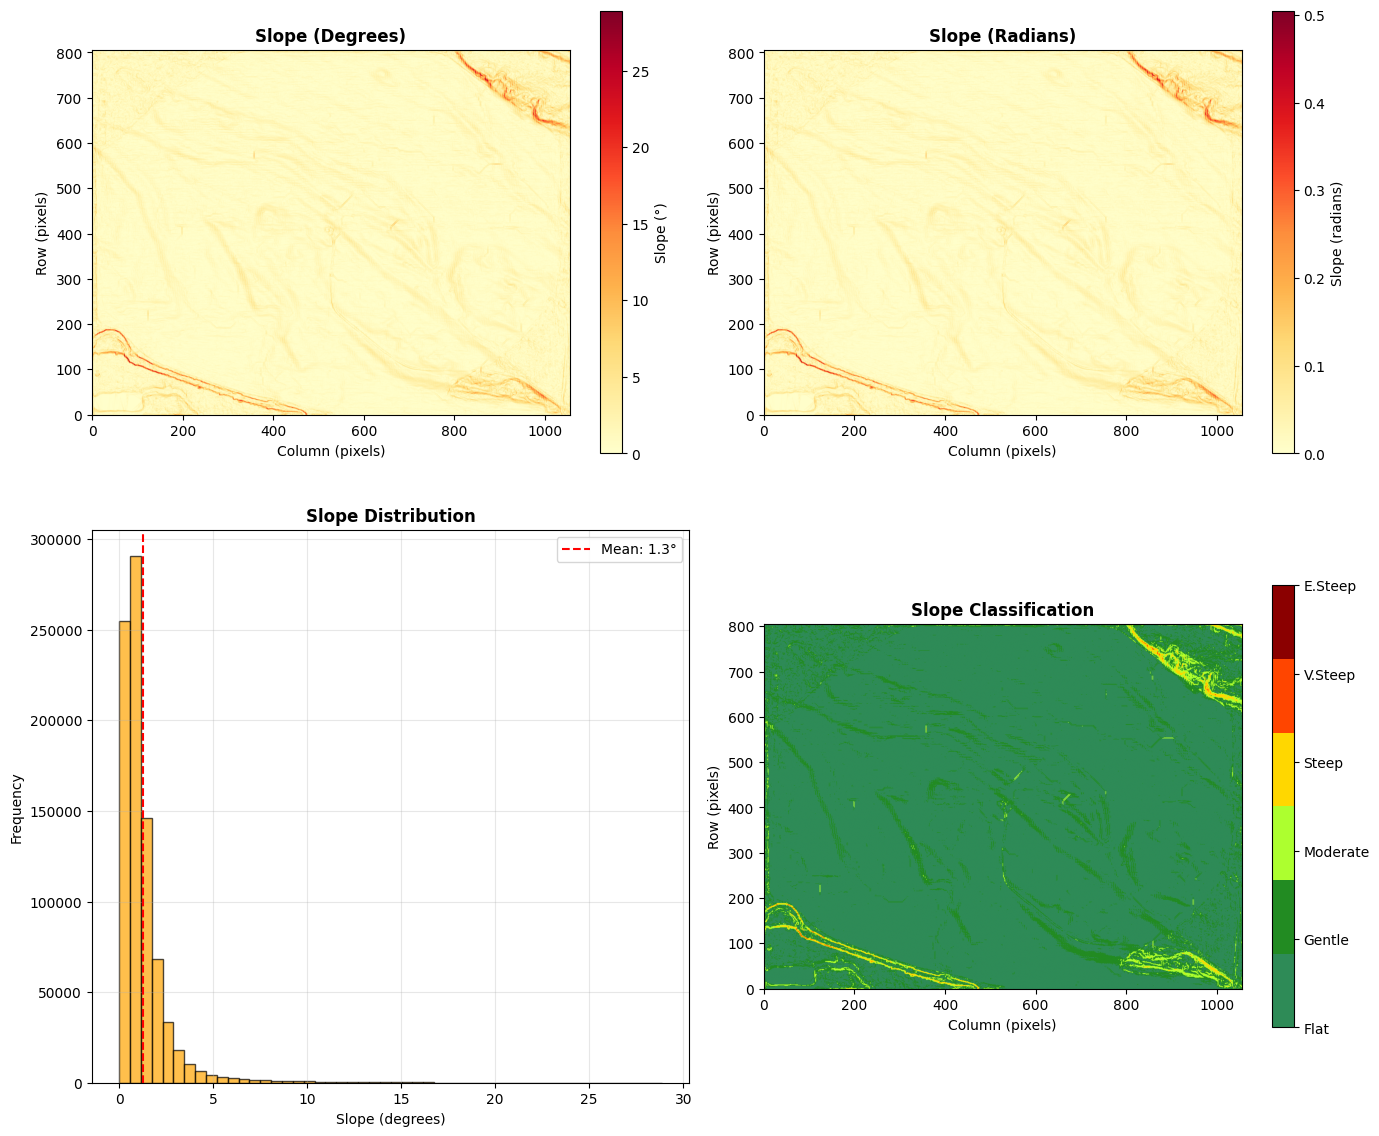

   ✅ Slope visualization complete!
   💡 Red areas = steep slopes (ridges, cliffs)
   💡 Yellow areas = moderate slopes (hillslopes)
   💡 Green areas = gentle slopes (valleys, plains)

🎯 Ready for wetness index calculation!
   • Slope range: 0.0° to 28.9°
   • Average terrain steepness: 1.3°


: 

In [ ]:
# Step 5: Slope Calculation
# Calculate terrain slope from the filled DEM

print("📐 Slope Calculation")
print("=" * 50)

# Define output file paths
slope_degrees_path = os.path.join(current_dir, "slope_degrees.tif")
slope_radians_path = os.path.join(current_dir, "slope_radians.tif")

print("\n🔸 Calculating slope in degrees...")
print("   • Using Horn's method (3×3 neighborhood)")
print("   • Accounts for all 8 neighboring cells")
print("   • Provides smooth slope estimates")

try:
    wbt.slope(
        dem=filled_dem_path,
        output=slope_degrees_path,
        units="degrees"
    )
    
    if os.path.exists(slope_degrees_path):
        print("   ✅ Slope calculation completed successfully")
        
        # Load slope data
        with rasterio.open(slope_degrees_path) as src:
            slope_deg_data = src.read(1)
            slope_profile = src.profile
            
        print(f"\n📊 Slope Statistics (degrees):")
        print(f"   • Minimum slope: {np.min(slope_deg_data):.2f}°")
        print(f"   • Maximum slope: {np.max(slope_deg_data):.2f}°")
        print(f"   • Mean slope: {np.mean(slope_deg_data):.2f}°")
        print(f"   • Standard deviation: {np.std(slope_deg_data):.2f}°")
        print(f"   • Median slope: {np.median(slope_deg_data):.2f}°")
        
        # Convert to radians for wetness index calculation
        print(f"\n🔸 Converting slope to radians...")
        print("   • Required for wetness index formula: TWI = ln(SCA / tan(slope))")
        
        slope_rad_data = np.radians(slope_deg_data)
        
        # Save slope in radians
        with rasterio.open(slope_radians_path, 'w', **slope_profile) as dst:
            dst.write(slope_rad_data, 1)
        
        print(f"   ✅ Slope in radians saved to: {os.path.basename(slope_radians_path)}")
        
        print(f"\n📊 Slope Statistics (radians):")
        print(f"   • Minimum slope: {np.min(slope_rad_data):.4f} rad")
        print(f"   • Maximum slope: {np.max(slope_rad_data):.4f} rad")
        print(f"   • Mean slope: {np.mean(slope_rad_data):.4f} rad")
        
        # Create slope classification for analysis
        slope_classes = np.digitize(slope_deg_data, bins=[0, 2, 5, 10, 20, 30, 90])
        class_names = ['Flat (0-2°)', 'Gentle (2-5°)', 'Moderate (5-10°)', 
                      'Steep (10-20°)', 'Very Steep (20-30°)', 'Extremely Steep (>30°)']
        
        print(f"\n📈 Slope Classification:")
        total_cells = slope_deg_data.size
        for i, class_name in enumerate(class_names):
            count = np.sum(slope_classes == i+1)
            percentage = (count / total_cells) * 100
            print(f"   • {class_name}: {count:,} cells ({percentage:.1f}%)")
        
        # Visualization
        print(f"\n📊 Creating slope visualization...")
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))
        
        # 1. Slope in degrees
        im1 = axes[0,0].imshow(slope_deg_data, cmap='YlOrRd', origin='lower')
        axes[0,0].set_title('Slope (Degrees)', fontweight='bold')
        axes[0,0].set_xlabel('Column (pixels)')
        axes[0,0].set_ylabel('Row (pixels)')
        cbar1 = plt.colorbar(im1, ax=axes[0,0], shrink=0.8)
        cbar1.set_label('Slope (°)')
        
        # 2. Slope in radians
        im2 = axes[0,1].imshow(slope_rad_data, cmap='YlOrRd', origin='lower')
        axes[0,1].set_title('Slope (Radians)', fontweight='bold')
        axes[0,1].set_xlabel('Column (pixels)')
        axes[0,1].set_ylabel('Row (pixels)')
        cbar2 = plt.colorbar(im2, ax=axes[0,1], shrink=0.8)
        cbar2.set_label('Slope (radians)')
        
        # 3. Slope distribution
        axes[1,0].hist(slope_deg_data.flatten(), bins=50, alpha=0.7, 
                      color='orange', edgecolor='black')
        axes[1,0].set_title('Slope Distribution', fontweight='bold')
        axes[1,0].set_xlabel('Slope (degrees)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].axvline(np.mean(slope_deg_data), color='red', linestyle='--', 
                         label=f'Mean: {np.mean(slope_deg_data):.1f}°')
        axes[1,0].legend()
        
        # 4. Slope classification
        colors = ['#2E8B57', '#228B22', '#ADFF2F', '#FFD700', '#FF4500', '#8B0000']
        cmap_classes = plt.matplotlib.colors.ListedColormap(colors)
        
        im4 = axes[1,1].imshow(slope_classes, cmap=cmap_classes, 
                              origin='lower', vmin=1, vmax=6)
        axes[1,1].set_title('Slope Classification', fontweight='bold')
        axes[1,1].set_xlabel('Column (pixels)')
        axes[1,1].set_ylabel('Row (pixels)')
        
        # Create custom colorbar
        cbar4 = plt.colorbar(im4, ax=axes[1,1], shrink=0.8, ticks=range(1,7))
        cbar4.set_ticklabels(['Flat', 'Gentle', 'Moderate', 'Steep', 'V.Steep', 'E.Steep'])
        
        plt.tight_layout()
        plt.show()
        
        print(f"   ✅ Slope visualization complete!")
        print(f"   💡 Red areas = steep slopes (ridges, cliffs)")
        print(f"   💡 Yellow areas = moderate slopes (hillslopes)")
        print(f"   💡 Green areas = gentle slopes (valleys, plains)")
        
    else:
        print("   ❌ Slope calculation failed - output file not created")
        slope_deg_data = None
        slope_rad_data = None
        
except Exception as e:
    print(f"   ❌ Error during slope calculation: {e}")
    slope_deg_data = None
    slope_rad_data = None

if slope_deg_data is not None:
    print(f"\n🎯 Ready for wetness index calculation!")
    print(f"   • Slope range: {np.min(slope_deg_data):.1f}° to {np.max(slope_deg_data):.1f}°")
    print(f"   • Average terrain steepness: {np.mean(slope_deg_data):.1f}°")
else:
    print(f"\n❌ Cannot proceed without slope data")
    print(f"   💡 Check your filled DEM and WhiteboxTools installation")

## 6. Topographic Wetness Index (TWI) Calculation

### 🧮 The TWI Formula

**TWI = ln(SCA / tan(slope))**

Where:
- **SCA** = Specific Contributing Area (from flow accumulation)
- **slope** = Terrain slope in radians
- **ln** = Natural logarithm

### 🎯 Physical Interpretation:

| TWI Value | Interpretation | Landscape Feature |
|-----------|----------------|------------------|
| **< -5** | Very dry | Ridge tops, steep slopes |
| **-5 to 0** | Dry to moderate | Hillslopes, shoulders |
| **0 to 5** | Moderate to wet | Footslopes, depressions |
| **> 5** | Very wet | Stream channels, wetlands |

### 💧 What High TWI Means:
- **High flow accumulation** (lots of water drains here)
- **Low slope** (water moves slowly, has time to infiltrate)
- **Result**: High probability of soil saturation

### 🏔️ What Low TWI Means:
- **Low flow accumulation** (little water drains here)
- **High slope** (water moves quickly, less infiltration)
- **Result**: Well-drained conditions

### ⚠️ Important Considerations:
- **Minimum slope threshold**: Prevents division by zero
- **Flow algorithm choice**: Affects TWI distribution
- **DEM resolution**: Influences spatial detail

In [ ]:
# Step 6: Topographic Wetness Index (TWI) Calculation
# Calculate TWI using the formula: TWI = ln(SCA / tan(slope))

print("💧 Topographic Wetness Index (TWI) Calculation")
print("=" * 50)

def calculate_twi(flow_accumulation, slope_radians, min_slope_threshold=0.001):
    """
    Calculate Topographic Wetness Index (TWI)
    
    Parameters:
    -----------
    flow_accumulation : numpy.ndarray
        Flow accumulation (specific contributing area) in m²/m
    slope_radians : numpy.ndarray
        Slope in radians
    min_slope_threshold : float
        Minimum slope to avoid division by zero (default: 0.001 rad ≈ 0.057°)
    
    Returns:
    --------
    numpy.ndarray : TWI values
    """
    # Apply minimum slope threshold to avoid division by zero
    slope_safe = np.maximum(slope_radians, min_slope_threshold)
    
    # Calculate TWI: ln(SCA / tan(slope))
    twi = np.log(flow_accumulation / np.tan(slope_safe))
    
    return twi

# Check available flow accumulation data
print("\n🔍 Checking available flow accumulation data...")
twi_results = {}
twi_file_paths = {}

# Calculate TWI for each available flow method
for method in successful_methods:
    print(f"\n🔸 Calculating TWI using {method} flow accumulation...")
    
    try:
        # Get flow accumulation data
        flow_data_method = flow_data[method]
        
        # Calculate TWI
        twi_data = calculate_twi(flow_data_method, slope_rad_data)
        twi_results[method] = twi_data
        
        # Define output file path
        twi_filename = f"twi_{method.lower().replace('-', '_')}.tif"
        twi_file_path = os.path.join(current_dir, twi_filename)
        twi_file_paths[method] = twi_file_path
        
        # Save TWI raster
        with rasterio.open(slope_radians_path) as src:
            twi_profile = src.profile.copy()
            twi_profile.update(dtype=rasterio.float32)
        
        with rasterio.open(twi_file_path, 'w', **twi_profile) as dst:
            dst.write(twi_data.astype(np.float32), 1)
        
        print(f"   ✅ TWI calculated and saved: {twi_filename}")
        
        # Calculate statistics
        valid_twi = twi_data[np.isfinite(twi_data)]
        
        print(f"   📊 TWI Statistics ({method}):")
        print(f"      • Range: {np.min(valid_twi):.2f} to {np.max(valid_twi):.2f}")
        print(f"      • Mean: {np.mean(valid_twi):.2f}")
        print(f"      • Median: {np.median(valid_twi):.2f}")
        print(f"      • Standard deviation: {np.std(valid_twi):.2f}")
        print(f"      • 10th percentile: {np.percentile(valid_twi, 10):.2f}")
        print(f"      • 90th percentile: {np.percentile(valid_twi, 90):.2f}")
        
    except Exception as e:
        print(f"   ❌ Error calculating TWI with {method}: {e}")

# Results summary
print(f"\n📊 TWI Calculation Summary:")
print(f"   • Successfully calculated: {len(twi_results)} TWI maps")
print(f"   • Methods completed: {', '.join(twi_results.keys())}")

if twi_results:
    # Create comprehensive visualization
    print(f"\n📊 Creating TWI visualization...")
    
    n_methods = len(twi_results)
    if n_methods == 1:
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(2, n_methods, figsize=(7*n_methods, 12))
        if n_methods == 1:
            axes = axes.reshape(2, 1)
    
    # Color scheme for TWI (blue = wet, red = dry)
    twi_cmap = 'RdYlBu'
    
    # Plot TWI maps
    for i, (method, twi_data) in enumerate(twi_results.items()):
        if n_methods == 1:
            ax = axes[i]
        else:
            ax = axes[0, i]
            
        im = ax.imshow(twi_data, cmap=twi_cmap, origin='lower')
        ax.set_title(f'TWI - {method} Method', fontweight='bold')
        ax.set_xlabel('Column (pixels)')
        ax.set_ylabel('Row (pixels)')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label('TWI')
        
        # Add interpretation text
        ax.text(0.02, 0.98, 'Blue = Wet areas\nRed = Dry areas', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)
    
    # Plot TWI histograms
    for i, (method, twi_data) in enumerate(twi_results.items()):
        if n_methods == 1:
            ax = axes[i+1] if len(axes) > n_methods else axes[1]
        else:
            ax = axes[1, i]
            
        valid_twi = twi_data[np.isfinite(twi_data)]
        
        ax.hist(valid_twi, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'TWI Distribution - {method}', fontweight='bold')
        ax.set_xlabel('TWI')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        
        # Add statistical lines
        mean_twi = np.mean(valid_twi)
        median_twi = np.median(valid_twi)
        
        ax.axvline(mean_twi, color='red', linestyle='--', label=f'Mean: {mean_twi:.2f}')
        ax.axvline(median_twi, color='orange', linestyle='--', label=f'Median: {median_twi:.2f}')
        ax.legend()
        
        # Add wetness thresholds
        ax.axvline(0, color='green', linestyle=':', alpha=0.7, label='Dry/Wet threshold')
        ax.axvline(2, color='blue', linestyle=':', alpha=0.7, label='Wetland threshold')
    
    plt.tight_layout()
    plt.show()
    
    # Method comparison (if multiple methods available)
    if len(twi_results) > 1:
        print(f"\n🔍 Comparing TWI methods...")
        
        methods = list(twi_results.keys())
        method1, method2 = methods[0], methods[1]
        
        twi1 = twi_results[method1]
        twi2 = twi_results[method2]
        
        # Calculate correlation
        valid_mask = np.isfinite(twi1) & np.isfinite(twi2)
        correlation = np.corrcoef(twi1[valid_mask], twi2[valid_mask])[0, 1]
        
        print(f"   • Correlation between {method1} and {method2}: {correlation:.3f}")
        
        # Mean absolute difference
        mean_diff = np.mean(np.abs(twi1[valid_mask] - twi2[valid_mask]))
        print(f"   • Mean absolute difference: {mean_diff:.3f}")
        
        # Create comparison plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Scatter plot
        sample_indices = np.random.choice(np.sum(valid_mask), 
                                        min(10000, np.sum(valid_mask)), 
                                        replace=False)
        sample_mask = np.zeros(valid_mask.shape, dtype=bool)
        sample_mask[valid_mask] = False
        sample_mask[np.where(valid_mask)[0][sample_indices], 
                   np.where(valid_mask)[1][sample_indices]] = True
        
        ax1.scatter(twi1[sample_mask], twi2[sample_mask], alpha=0.3, s=1)
        ax1.set_xlabel(f'TWI - {method1}')
        ax1.set_ylabel(f'TWI - {method2}')
        ax1.set_title(f'TWI Method Comparison\n(r = {correlation:.3f})')
        ax1.grid(True, alpha=0.3)
        
        # Add 1:1 line
        min_val = min(np.min(twi1[valid_mask]), np.min(twi2[valid_mask]))
        max_val = max(np.max(twi1[valid_mask]), np.max(twi2[valid_mask]))
        ax1.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, label='1:1 line')
        ax1.legend()
        
        # Difference map
        diff_map = twi1 - twi2
        im2 = ax2.imshow(diff_map, cmap='RdBu_r', origin='lower')
        ax2.set_title(f'TWI Difference\n({method1} - {method2})')
        ax2.set_xlabel('Column (pixels)')
        ax2.set_ylabel('Row (pixels)')
        plt.colorbar(im2, ax=ax2, label='TWI Difference')
        
        plt.tight_layout()
        plt.show()
    
    print(f"\n✅ TWI calculation complete!")
    print(f"   🎯 Higher TWI values (blue) = wetter areas")
    print(f"   🎯 Lower TWI values (red) = drier areas")
    print(f"   💡 TWI > 0: Potentially wet areas")
    print(f"   💡 TWI > 2: Potential wetlands")
    print(f"   💡 TWI > 5: Likely stream channels")
    
    # Select the best method for further analysis (prefer FD8 if available)
    if 'FD8' in twi_results:
        best_method = 'FD8'
        best_twi = twi_results['FD8']
        print(f"\n🏆 Using FD8 method for further analysis (most realistic)")
    else:
        best_method = list(twi_results.keys())[0]
        best_twi = twi_results[best_method]
        print(f"\n🏆 Using {best_method} method for further analysis")
    
else:
    print(f"\n❌ No TWI calculations completed successfully")
    print(f"   💡 Check flow accumulation and slope calculation steps")
    best_twi = None
    best_method = None

print(f"\n🎯 Ready for advanced wetness analysis!")

💧 Topographic Wetness Index (TWI) Calculation

🔍 Checking available flow accumulation data...

🔸 Calculating TWI using D8 flow accumulation...
   ✅ TWI calculated and saved: twi_d8.tif
   📊 TWI Statistics (D8):
      • Range: -10.99 to 7.48
      • Mean: -6.13
      • Median: -6.76
      • Standard deviation: 2.14
      • 10th percentile: -8.04
      • 90th percentile: -3.23

🔸 Calculating TWI using FD8 flow accumulation...
   ✅ TWI calculated and saved: twi_fd8.tif
   📊 TWI Statistics (FD8):
      • Range: -10.27 to 7.48
      • Mean: -5.67
      • Median: -6.20
      • Standard deviation: 2.02
      • 10th percentile: -7.55
      • 90th percentile: -3.06

🔸 Calculating TWI using D-infinity flow accumulation...
   ✅ TWI calculated and saved: twi_d_infinity.tif
   📊 TWI Statistics (D-infinity):
      • Range: -10.99 to 7.48
      • Mean: -6.08
      • Median: -6.72
      • Standard deviation: 2.12
      • 10th percentile: -7.96
      • 90th percentile: -3.21

📊 TWI Calculation Summary: